# Outlier Detection 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
iris = load_iris(as_frame=True)
data = iris.frame
data = data.drop(columns=['target'])  

print("Dataset Shape:", data.shape)
print(data.head(10))

Dataset Shape: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


## Visualize Outliers

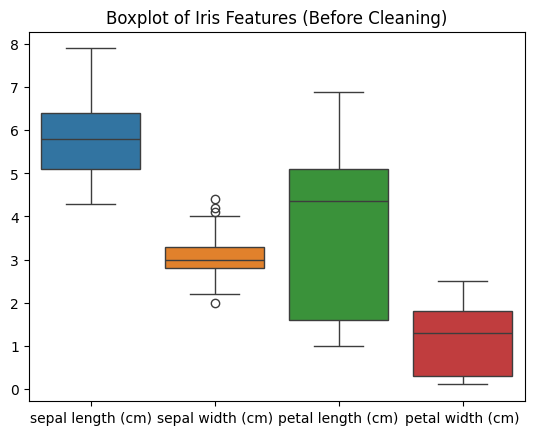

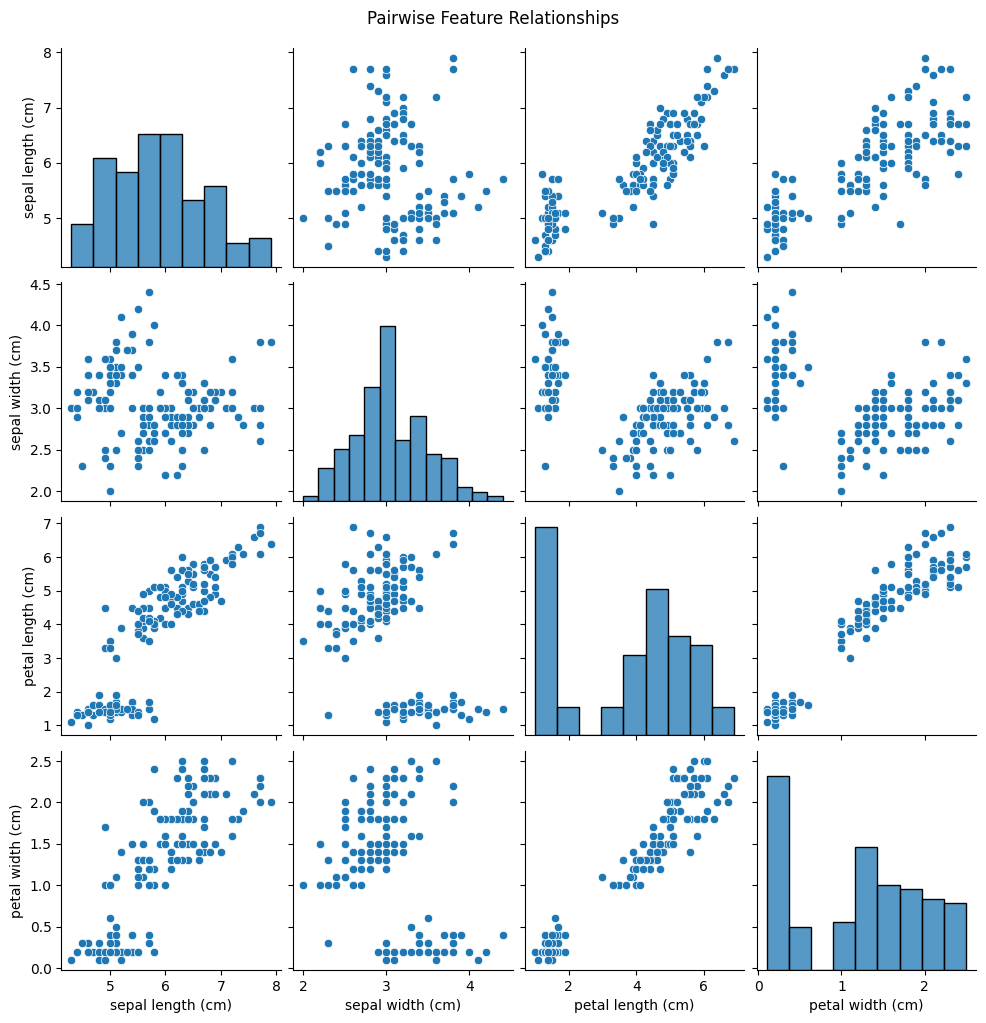

In [4]:
sns.boxplot(data=data)
plt.title("Boxplot of Iris Features (Before Cleaning)")
plt.show()

sns.pairplot(data)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


## Z-Score Method


After Z-Score Filtering: (149, 4)


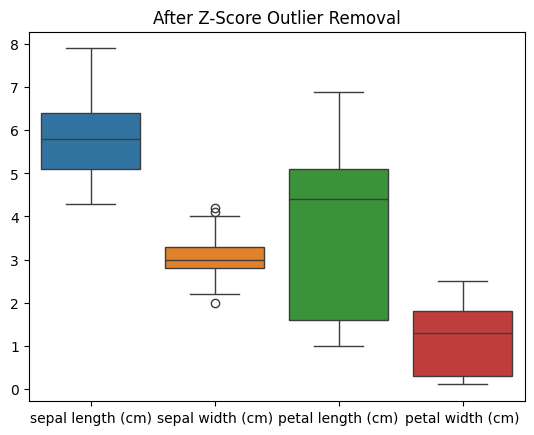

In [5]:
z_scores = np.abs(stats.zscore(data))
threshold = 3
filtered_entries = (z_scores < threshold).all(axis=1)
data_zscore = data[filtered_entries]

print("After Z-Score Filtering:", data_zscore.shape)

sns.boxplot(data=data_zscore)
plt.title("After Z-Score Outlier Removal")
plt.show()

## IQR Method


After IQR Filtering: (146, 4)


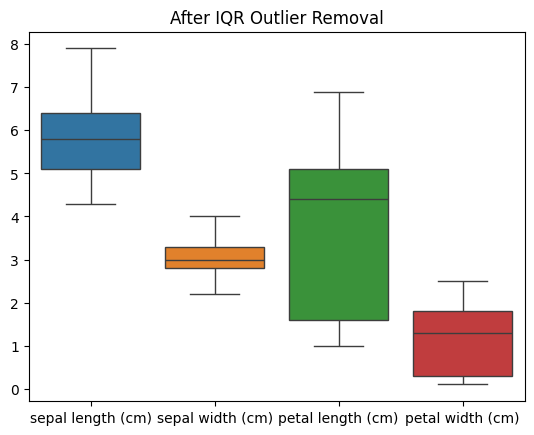

In [6]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_iqr = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]
print("After IQR Filtering:", data_iqr.shape)

sns.boxplot(data=data_iqr)
plt.title("After IQR Outlier Removal")
plt.show()


## Isolation Forest


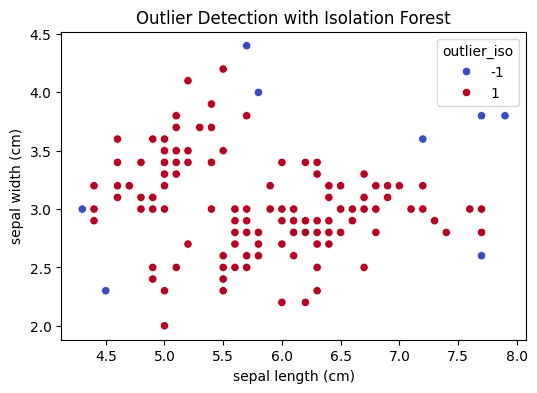

Isolation Forest Label Counts:
 outlier_iso
 1    142
-1      8
Name: count, dtype: int64


In [7]:
iso = IsolationForest(contamination=0.05, random_state=42)
data['outlier_iso'] = iso.fit_predict(data)

plt.figure(figsize=(6,4))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='outlier_iso', data=data, palette='coolwarm')
plt.title("Outlier Detection with Isolation Forest")
plt.show()

print("Isolation Forest Label Counts:\n", data['outlier_iso'].value_counts())

## DBSCAN

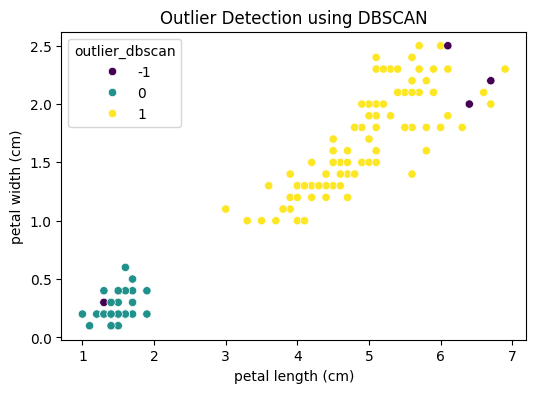

DBSCAN Label Counts:
 outlier_dbscan
 1    97
 0    49
-1     4
Name: count, dtype: int64


In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['outlier_iso']))

db = DBSCAN(eps=0.8, min_samples=5).fit(data_scaled)
data['outlier_dbscan'] = db.labels_

plt.figure(figsize=(6,4))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='outlier_dbscan', data=data, palette='viridis')
plt.title("Outlier Detection using DBSCAN")
plt.show()

print("DBSCAN Label Counts:\n", data['outlier_dbscan'].value_counts())